In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Função para ler e processar os arquivos CSV
def read_sar_file(filepath):
    # Leitura do arquivo CSV
    df = pd.read_csv(filepath, header=0)
    
    # Calculando o uso total de CPU (100 - idle)
    df['cpu_usage'] = 100 - df['idle']
    
    # Filtrando apenas as linhas com CPU 'all'
    df = df[df['CPU'] == 'all']
    
    return df

# Leitura dos arquivos
dnsfw_no = read_sar_file('../../Python/results_20241225/sar_output_dnsfw_no.csv')
dnsfw_rpz = read_sar_file('../../Python/results_20241225/sar_output_dnsfw_rpz.csv')
dnsfw_xdp = read_sar_file('../../Python/results_20241225/sar_output_dnsfw_xdp.csv')

# Criando um DataFrame com as estatísticas básicas
stats_data = {
    'Sistema': ['Sem DNS Firewall', 'DNS Firewall RPZ', 'DNS Firewall XDP'],
    'Média CPU (%)': [
        dnsfw_no['cpu_usage'].mean(),
        dnsfw_rpz['cpu_usage'].mean(),
        dnsfw_xdp['cpu_usage'].mean()
    ],
    'Mediana CPU (%)': [
        dnsfw_no['cpu_usage'].median(),
        dnsfw_rpz['cpu_usage'].median(),
        dnsfw_xdp['cpu_usage'].median()
    ],
    'Desvio Padrão (%)': [
        dnsfw_no['cpu_usage'].std(),
        dnsfw_rpz['cpu_usage'].std(),
        dnsfw_xdp['cpu_usage'].std()
    ],
    'Máximo (%)': [
        dnsfw_no['cpu_usage'].max(),
        dnsfw_rpz['cpu_usage'].max(),
        dnsfw_xdp['cpu_usage'].max()
    ],
    'Mínimo (%)': [
        dnsfw_no['cpu_usage'].min(),
        dnsfw_rpz['cpu_usage'].min(),
        dnsfw_xdp['cpu_usage'].min()
    ]
}

stats_df = pd.DataFrame(stats_data)

Estatísticas de Uso de CPU:
         Sistema  Média CPU (%)  Mediana CPU (%)  Desvio Padrão (%)  Máximo (%)  Mínimo (%)
Sem DNS Firewall          14.34            15.63              11.94       30.92         0.0
DNS Firewall RPZ          13.22            12.71              12.02       31.91         0.0
DNS Firewall XDP          14.01            13.87              11.86       31.23         0.0


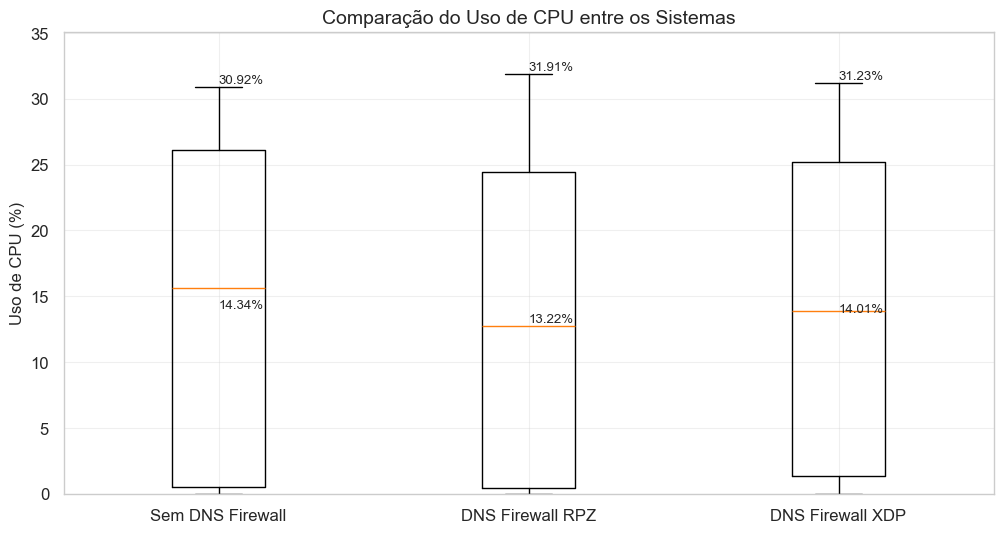

In [23]:
# Exibindo as estatísticas
print("Estatísticas de Uso de CPU:")
print(stats_df.round(2).to_string(index=False))

# Criando o gráfico de boxplot
plt.figure(figsize=(12, 6))

plt.style.use('seaborn-v0_8-paper')
sns.set_context("paper")
sns.set_style("whitegrid")

# Criando o boxplot
data = [dnsfw_no['cpu_usage'], dnsfw_rpz['cpu_usage'], dnsfw_xdp['cpu_usage']]
labels = ['Sem DNS Firewall', 'DNS Firewall RPZ', 'DNS Firewall XDP']
box_plot = plt.boxplot(data, tick_labels=labels)
#plt.xticks(fontsize=12)
plt.tick_params(axis='both', labelsize=12)

# Adicionando os valores de média e máxima
for i in range(len(data)):
    mean_val = stats_df['Média CPU (%)'][i]
    max_val = stats_df['Máximo (%)'][i]
    
    # Adicionando valor da média
    plt.text(i+1, mean_val, f'{mean_val:.2f}%', 
             horizontalalignment='left', verticalalignment='center')
    
    # Adicionando valor máximo
    plt.text(i+1, max_val, f'{max_val:.2f}%', 
             horizontalalignment='left', verticalalignment='bottom')

plt.title('Comparação do Uso de CPU entre os Sistemas', fontsize=14)
plt.ylabel('Uso de CPU (%)', fontsize=12)
plt.grid(True, alpha=0.3)

# Ajustando os limites do eixo y para acomodar os textos
plt.ylim(0, max(stats_df['Máximo (%)']) * 1.1)

# Salvando com configurações completas
plt.savefig('cpu_sistemas.png',
            dpi=300,              # resolução
            bbox_inches='tight',  # remove espaço em branco extra
            pad_inches=0.1,       # pequena margem
            format='png',         # formato do arquivo
            transparent=False,    # fundo não transparente
            facecolor='white',    # cor do fundo
            edgecolor='none',     # sem borda
            )

plt.show()



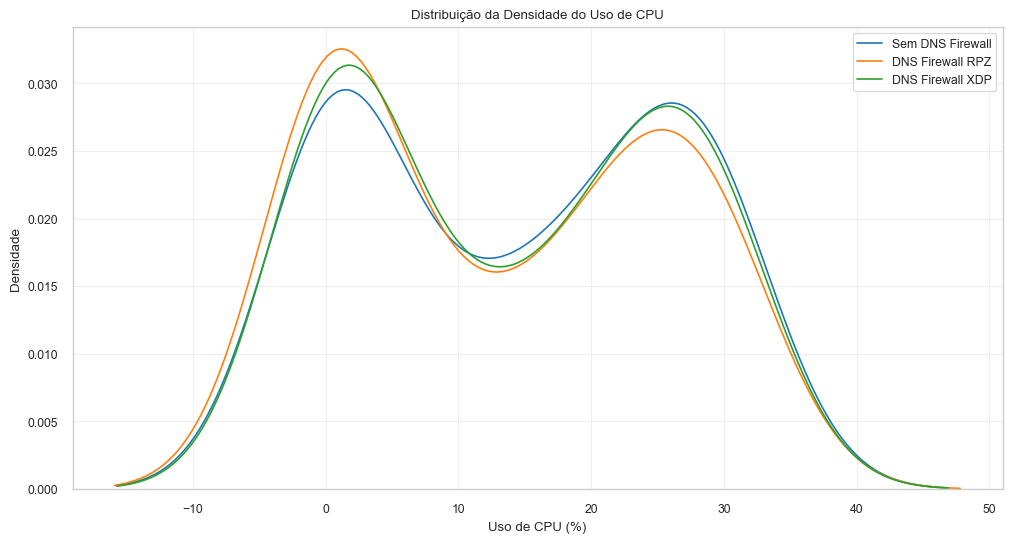


Análise de Componentes do CPU para cada sistema:

Sem DNS Firewall:
usr: 8.29%
sys: 4.05%
iowait: 0.12%
irq: 0.85%
soft: 1.04%

DNS Firewall RPZ:
usr: 7.74%
sys: 3.65%
iowait: 0.10%
irq: 0.79%
soft: 0.95%

DNS Firewall XDP:
usr: 8.08%
sys: 3.95%
iowait: 0.11%
irq: 0.84%
soft: 1.03%


In [4]:
# Criando o gráfico de densidade
plt.figure(figsize=(12, 6))
sns.kdeplot(data=dnsfw_no['cpu_usage'], label='Sem DNS Firewall')
sns.kdeplot(data=dnsfw_rpz['cpu_usage'], label='DNS Firewall RPZ')
sns.kdeplot(data=dnsfw_xdp['cpu_usage'], label='DNS Firewall XDP')
plt.title('Distribuição da Densidade do Uso de CPU')
plt.xlabel('Uso de CPU (%)')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Análise estatística adicional
print("\nAnálise de Componentes do CPU para cada sistema:")

# Função para calcular médias dos componentes
def analyze_components(df, system_name):
    components = ['usr', 'sys', 'iowait', 'irq', 'soft']
    means = {comp: df[df['CPU'] == 'all'][comp].mean() for comp in components}
    print(f"\n{system_name}:")
    for comp, value in means.items():
        print(f"{comp}: {value:.2f}%")

analyze_components(dnsfw_no, "Sem DNS Firewall")
analyze_components(dnsfw_rpz, "DNS Firewall RPZ")
analyze_components(dnsfw_xdp, "DNS Firewall XDP")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13632\62532725.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13632\62532725.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13632\62532725.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])


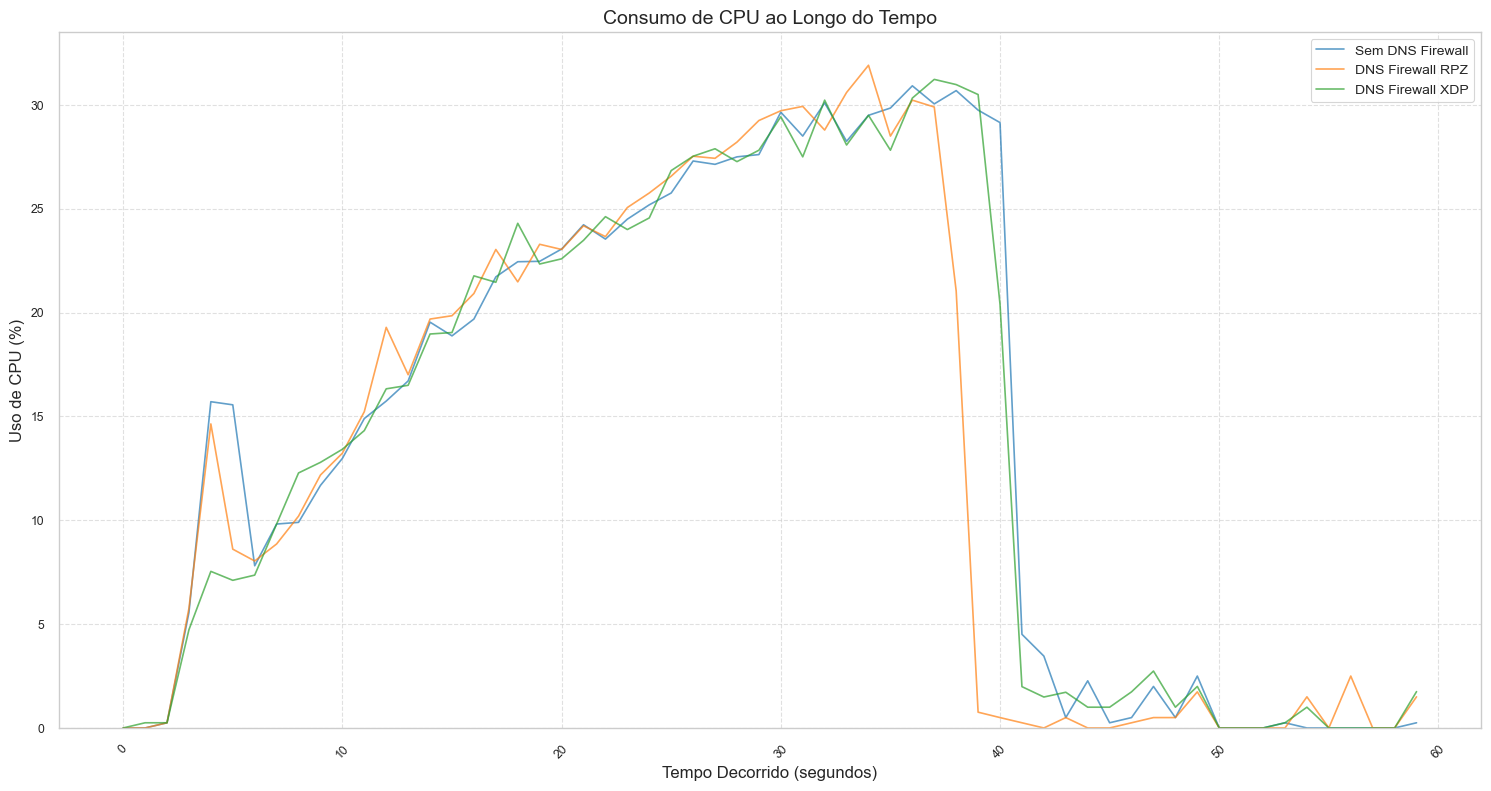


Duração dos testes:
Sem DNS Firewall: 59.00 segundos
DNS Firewall RPZ: 59.00 segundos
DNS Firewall XDP: 59.00 segundos


In [7]:
# Função para processar o timestamp
def process_timestamp(df):
    # Converte a coluna Timestamp para datetime
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    # Calcula o tempo decorrido em segundos desde o início
    df['seconds_elapsed'] = (df['Timestamp'] - df['Timestamp'].min()).dt.total_seconds()
    return df

# Processando os dados
dnsfw_no = process_timestamp(read_sar_file('../../Python/results_20241225/sar_output_dnsfw_no.csv'))
dnsfw_rpz = process_timestamp(read_sar_file('../../Python/results_20241225/sar_output_dnsfw_rpz.csv'))
dnsfw_xdp = process_timestamp(read_sar_file('../../Python/results_20241225/sar_output_dnsfw_xdp.csv'))

# Criando o gráfico
plt.figure(figsize=(15, 8))

# Plotando as linhas para cada sistema
plt.plot(dnsfw_no['seconds_elapsed'], dnsfw_no['cpu_usage'], 
         label='Sem DNS Firewall', alpha=0.7)
plt.plot(dnsfw_rpz['seconds_elapsed'], dnsfw_rpz['cpu_usage'], 
         label='DNS Firewall RPZ', alpha=0.7)
plt.plot(dnsfw_xdp['seconds_elapsed'], dnsfw_xdp['cpu_usage'], 
         label='DNS Firewall XDP', alpha=0.7)

# Configurando o gráfico
plt.title('Consumo de CPU ao Longo do Tempo', fontsize=14)
plt.xlabel('Tempo Decorrido (segundos)', fontsize=12)
plt.ylabel('Uso de CPU (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

# Ajustando os limites do eixo y para melhor visualização
y_min = min(dnsfw_no['cpu_usage'].min(), 
            dnsfw_rpz['cpu_usage'].min(), 
            dnsfw_xdp['cpu_usage'].min())
y_max = max(dnsfw_no['cpu_usage'].max(), 
            dnsfw_rpz['cpu_usage'].max(), 
            dnsfw_xdp['cpu_usage'].max())
plt.ylim(y_min * 0.95, y_max * 1.05)

# Adicionando uma grade mais suave
plt.grid(True, linestyle='--', alpha=0.6)

# Rotacionando os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Ajustando o layout
plt.tight_layout()

# Mostrando o gráfico
plt.show()

# Imprimindo algumas estatísticas sobre a duração dos testes
print("\nDuração dos testes:")
print(f"Sem DNS Firewall: {dnsfw_no['seconds_elapsed'].max():.2f} segundos")
print(f"DNS Firewall RPZ: {dnsfw_rpz['seconds_elapsed'].max():.2f} segundos")
print(f"DNS Firewall XDP: {dnsfw_xdp['seconds_elapsed'].max():.2f} segundos")

In [9]:
from scipy import stats

# Função para calcular intervalo de confiança
def calculate_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    sem = stats.sem(data)  # Erro padrão da média
    ci = stats.t.interval(confidence, n-1, mean, sem)
    return mean, ci[0], ci[1]

# Lendo e processando os dados
dnsfw_no = read_sar_file('../../Python/results_20241225/sar_output_dnsfw_no.csv')
dnsfw_rpz = read_sar_file('../../Python/results_20241225/sar_output_dnsfw_rpz.csv')
dnsfw_xdp = read_sar_file('../../Python/results_20241225/sar_output_dnsfw_xdp.csv')

# Calculando intervalos de confiança para cada sistema
no_mean, no_ci_low, no_ci_high = calculate_confidence_interval(dnsfw_no['cpu_usage'])
rpz_mean, rpz_ci_low, rpz_ci_high = calculate_confidence_interval(dnsfw_rpz['cpu_usage'])
xdp_mean, xdp_ci_low, xdp_ci_high = calculate_confidence_interval(dnsfw_xdp['cpu_usage'])

# Criando um DataFrame com os resultados
results_df = pd.DataFrame({
    'Sistema': ['Sem DNS Firewall', 'DNS Firewall RPZ', 'DNS Firewall XDP'],
    'Média': [no_mean, rpz_mean, xdp_mean],
    'IC Inferior': [no_ci_low, rpz_ci_low, xdp_ci_low],
    'IC Superior': [no_ci_high, rpz_ci_high, xdp_ci_high]
})

# Imprimindo os resultados
print("Resultados com Intervalo de Confiança de 95%:")
print(results_df.round(2))

# Criando o gráfico
plt.figure(figsize=(12, 6))

# Definindo posições das barras
x_pos = np.arange(len(results_df['Sistema']))

# Criando as barras
plt.bar(x_pos, results_df['Média'], yerr=[
    results_df['Média'] - results_df['IC Inferior'],
    results_df['IC Superior'] - results_df['Média']
], capsize=5, alpha=0.8, color=['blue', 'green', 'red'])

# Personalizando o gráfico
plt.title('Uso Médio de CPU com Intervalo de Confiança de 95%', fontsize=14)
plt.xlabel('Sistema', fontsize=12)
plt.ylabel('Uso de CPU (%)', fontsize=12)
plt.xticks(x_pos, results_df['Sistema'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.3)

# Adicionando valores nas barras
for i, v in enumerate(results_df['Média']):
    plt.text(i, v + 0.5, f'{v:.2f}%', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Calculando estatísticas adicionais
print("\nEstatísticas adicionais:")
for sistema in results_df['Sistema']:
    if sistema == 'Sem DNS Firewall':
        data = dnsfw_no['cpu_usage']
    elif sistema == 'DNS Firewall RPZ':
        data = dnsfw_rpz['cpu_usage']
    else:
        data = dnsfw_xdp['cpu_usage']
        
    print(f"\n{sistema}:")
    print(f"Desvio Padrão: {np.std(data):.2f}")
    print(f"Variância: {np.var(data):.2f}")
    print(f"Coeficiente de Variação: {(np.std(data)/np.mean(data))*100:.2f}%")

NameError: name 'np' is not defined